MSE for run1: 168.19900512695312
MSE for run2: 173.94590759277344
MSE for run3: 129.10089111328125
MSE for run4: 121.6501693725586
MSE for run5: 107.42149353027344
MSE for run6: 86.2511978149414
MSE for run7: 97.27188110351562
MSE for run8: 63.56034469604492
MSE for run9: 70.06584930419922
MSE for run10: 67.70840454101562
MSE for run11: 55.10328674316406
MSE for run12: 56.73074722290039
MSE for run13: 57.726802825927734
MSE for run14: 56.41860580444336
MSE for run15: 53.427310943603516
MSE for run16: 45.59796142578125
MSE for run17: 50.673946380615234
MSE for run18: 44.50418472290039
MSE for run19: 47.211021423339844
MSE for run20: 46.546287536621094
MSE for run21: 41.25898361206055
MSE for run22: 50.43815231323242
MSE for run23: 41.142269134521484
MSE for run24: 45.26235580444336
MSE for run25: 46.51347351074219
MSE for run26: 42.96490478515625
MSE for run27: 41.504241943359375
MSE for run28: 40.199012756347656
MSE for run29: 49.56077575683594
MSE for run30: 48.46841049194336
MSE for 

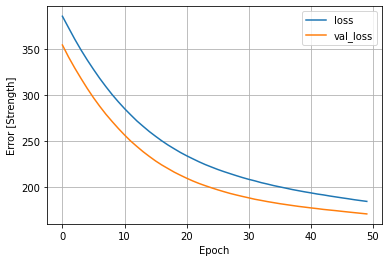

In [34]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('concrete_data.csv')

train, test = train_test_split(df, test_size=0.3)

train_labels = train.pop('Strength')
test_labels  = test.pop('Strength')

train =(train-train.mean())/train.std()
test =(test-test.mean())/test.std()

model = keras.Sequential(
    [
        keras.layers.Dense(10, activation="relu", input_shape=(train.shape[1],)),
        keras.layers.Dense(1),
    ]
)

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(
    train,
    train_labels,
    epochs=50,
    #calculate validation results on 20% of training data
    verbose=0,
    validation_split=0.2
)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Strength]')
  plt.legend()
  plt.grid(True)

test_mse = []

for i in range(50):
    train, test = train_test_split(df, test_size=0.3, random_state=i)

    train_labels = train.pop('Strength')
    test_labels  = test.pop('Strength')

    train =(train-train.mean())/train.std()
    test =(test-test.mean())/test.std()
    
    history = model.fit(train,
                            train_labels,
                            epochs=50,
                            #calculate validation results on 20% of training data
                            verbose=0,
                            validation_split=0.2
                        )
    MSE=model.evaluate(test, test_labels, verbose=0 )
    y_pred = model.predict(test)
    
    mean_square_error = mean_squared_error(test_labels, y_pred)
    test_mse.append(mean_square_error)
    print("MSE for run"+str(i+1)+": "+str(MSE))
    if i ==0:
        plot_loss(history)
    else:
        pass

mean of MSE results:  58.87389095810876
std of MSE results:  30.3358297876213


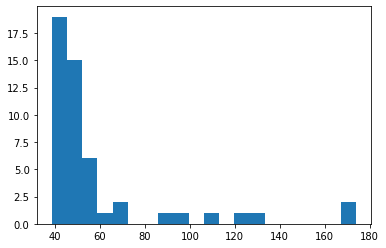

In [36]:
# plot the distribution of the results
plt.hist(test_mse, bins=20)
print('mean of MSE results: ', np.mean(test_mse))
print('std of MSE results: ', np.std(test_mse))